<a href="https://colab.research.google.com/github/SaqlainHussainShah/Hands-On-Machine-Learning/blob/master/Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from sklearn import datasets

In [0]:
from sklearn.datasets import load_digits

In [0]:
digits = datasets.load_digits()

In [0]:
X,y=digits.images, digits.target

In [24]:
X.shape

(1797, 8, 8)

In [0]:
X=X.reshape(1797,64)

In [40]:
X.shape

(1797, 64)

In [41]:
y.shape

(1797,)

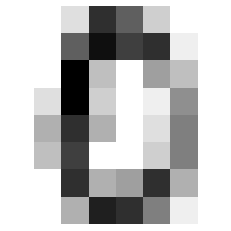

In [43]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

# some_digit=X[3600]
# some_digit_image=some_digit.reshape(28,28)
some_digit_image=X[304]
some_digit_image=some_digit_image.reshape(8,8)

plt.imshow(some_digit_image, cmap=matplotlib.cm.binary, interpolation="nearest")

plt.axis("off")
plt.show()

In [44]:
y[304]

0

In [0]:
X_train,X_test,y_train,y_test=X[:1600], X[1600:],y[:1600],y[1600:]

In [0]:
import numpy as np

shuffle_index=np.random.permutation(1600)
X_train,y_train=X_train[shuffle_index], y_train[shuffle_index]

In [0]:
y_train_5=(y_train==5)
y_test_5=(y_test==5)

#### Stochastic gradient descent
handles large datasets effeciently. deals with training instances independantly. Also suitable for online learning

In [48]:
from sklearn.linear_model import SGDClassifier

sgd_clf=SGDClassifier(random_state=42)
sgd_clf.fit(X_train,y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

##### Implementing Cross Validation

In [51]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds=StratifiedKFold(n_splits=3,random_state=42)
from sklearn.base import clone

for train_index, test_index in skfolds.split(X_train,y_train_5):
    clone_clf=clone(sgd_clf)
    X_train_folds=X_train[train_index]
    y_train_folds=(y_train_5[train_index])
    X_test_fold=X_train[test_index]
    y_test_fold=(y_train_5[test_index])
    
    clone_clf.fit(X_train_folds,y_train_folds)
    y_pred=clone_clf.predict(X_test_fold)
    n_correct=sum(y_pred==y_test_fold)
    print(n_correct/len(y_pred))

0.9887640449438202
0.9943714821763602
0.9906191369606003


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


#### Cross validation

In [52]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf,X_train, y_train_5,cv=3,scoring='accuracy')

array([0.98876404, 0.99437148, 0.99061914])

In [0]:
from sklearn.model_selection import cross_val_predict
y_train_pred=cross_val_predict(sgd_clf,X_train,y_train_5,cv=3)

##### Confusion Matrix

In [54]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

array([[1431,    6],
       [   8,  155]])